<a href="https://colab.research.google.com/github/shane90485/test/blob/main/5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.listdir("/content/drive/My Drive")
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/diabetes.csv")

print(df.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


In [32]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆

In [33]:
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()   # 顯示模型摘要資訊

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 18        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])


# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=15, batch_size=10)




Epoch 1/15
56/56 [==============================] - 1s 4ms/step - loss: 0.7871 - accuracy: 0.3466 - val_loss: 0.7154 - val_accuracy: 0.3986
Epoch 2/15
56/56 [==============================] - 0s 2ms/step - loss: 0.7105 - accuracy: 0.4534 - val_loss: 0.6791 - val_accuracy: 0.5507
Epoch 3/15
56/56 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.6096 - val_loss: 0.6575 - val_accuracy: 0.6739
Epoch 4/15
56/56 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.7077 - val_loss: 0.6397 - val_accuracy: 0.7246
Epoch 5/15
56/56 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.7146 - val_loss: 0.6194 - val_accuracy: 0.7246
Epoch 6/15
56/56 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.7375 - val_loss: 0.5915 - val_accuracy: 0.7319
Epoch 7/15
56/56 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.7353 - val_loss: 0.5597 - val_accuracy: 0.7464
Epoch 8/15
56/56 [==

In [35]:
loss, accuracy = model.evaluate(X_train, Y_train)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

22/22 [==============================] - 0s 922us/step - loss: 0.4620 - accuracy: 0.7812
測試資料集的準確度 = 0.78
3/3 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7051
測試資料集的準確度 = 0.71


In [36]:
# 測試資料集的預測值
predict_values = model.predict(X_test, batch_size=10, verbose=0)
print(predict_values[0])

[0.9930964  0.00690364]


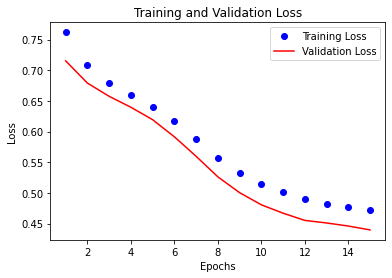

In [37]:
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

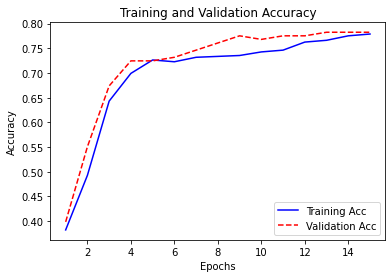

In [38]:
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

